<a href="https://colab.research.google.com/github/MarcosCosta-Py/DSNP/blob/master/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es_(M%C3%B3dulo5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn Prediction**

Quanto menor a taxa de rotatividade de uma empresa, melhor é seu desenvolvimento de negócio, garantindo eficiência no mercado. Mas para que isso aconteça é preciso aplicar técnicas adequadas para diminuir a evasão de clientes da base já existente.

<img src="https://t3.ftcdn.net/jpg/02/77/48/32/240_F_277483245_6xvCskKrwY5WEKAZ70uWhD758ia1VukS.jpg" width="70%">


A métrica de *Churn rate* indica o quanto sua empresa perdeu de clientes, o que influência diretamente no faturamento. Em serviços como Spotify ou Netflix, por exemplo, ela representaria a taxa de cancelamento de assinaturas.

Para ser calculada, basta dividir a quantidade de usuários que cancelaram os serviços pelo total que iniciaram, durante um determinado período. O valor mais baixo representa uma melhor classificação.

Mas como diminuir o índice de *Churn rate*? - Já que adiquirir um novo cliente pode custar até 5 vezes mais do que manter um ativo.

E a resposta é entender o motivo das possíveis evasões, pois na maioria das vezes o problema pode ser resolvido com uma melhoria de oferta da empresa ou na qualidade do produto, por isso os dados dos usuários junto aos *Feedbacks* são importantes.

Para complementar a estratégia na diminuição de *Churn rate*, técnicas de inteligência artificial, como algoritmos de Machine Learning são utilizadas, ao qual é capaz de antecipar potenciais desistentes que estão prestes a abandonar os serviços. Com os dados dos clientes é possível identificar esses padrões de comportamento.

Prever e previnir a rotatividade de clientes não só economizará muito dinheiro, como também representará um enorme fluxo de receita potencial adicional para a empresa.

*by [Marcos Costa](https://www.linkedin.com/in/ds-marcos-costa/)*

----------
[Fonte1](https://resultadosdigitais.com.br/blog/o-que-e-churn/)
[Fonte2](https://www.appier.com/blog/churn-prediction/)

## **Objetivo de estudo**

O intuito desse projeto é analisar os padrões nos dados dos usuários de uma empresa de telecomunicações, através de algoritmos de Machine Learning, para que seja atingido o objetivo de identificar os possíveis clientes que solicitarão o cancelamento do serviço. Propondo assim, condições de melhoria na oferta dos produtos da companhia, diminuindo a métrica de *Churn rate* e garantindo o negócio no mercado.

## **Aquisição dos Dados**

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), 
e tratam de um problema típico de uma companhia de telecomunicações. 

O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

Apesar de as variáveis serem um tanto quanto autoexplicativas, optei por descreve-las abaixo, caso haja dúvidas.

### **Dicionário das variáveis:**

* `customerID` : identificação do cliente 
* `gender`: gênero
* `SeniorCitizen` : Idoso ou não
* `Partner` : Clientes Parceiros
* `Dependents` : Clientes com ou sem dependentes
* `tenure` : Tempo de assinatura - (meses)
* `PhoneService` : Possui serviço telefônico
* `MultipleLines` : Possui múltiplas Linhas
* `InternetService` : Possui serviço de internet
* `OnlineSecurity` : Possui serviço de segurança Online
* `OnlineBackup` : Possui cópias de segurança Online
* `DeviceProtection` : Possui serviço de proteção de dispositivos
* `TechSupport` : Possui apoio técnico
* `StreamingTV` : Possui de conteúdos de Tv
* `StreamingMovies` : Possui de conteúdos de filmes
* `Contract` : Qual o tipo de contrato
* `PaperlessBilling` : Fatura impressa (No) ou não impressa (Yes)
* `PaymentMethod` : Forma de pagamento
* `MonthlyCharges` : Taxas Mensais
* `TotalCharges` : Taxas totais 
* `Churn` : Possui vínculo com a empresa ou cancelou.

## **Importando os pacotes necessários e os dados**

Para facilitar a importação dos dados, vamos utilizar o método `pd.read_csv`, do pandas, passando o link de interesse.

Mas antes devemos carregar as bibliotecas de interesse para o estudo.

In [93]:
!pip install scikit-plot -q

In [94]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [95]:
# importar os dados
dados = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(dados)

## **Análise Exploratória dos Dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento das composições básicas da estrutura do DataFrame.

In [96]:
# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [97]:
# ver tamanho do dataframe
df.shape

(7043, 21)

In [98]:
# verificar as colunas do DataFrame
print("Nomes das features:\n{}".format(df.columns.values))

Nomes das features:
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


Como podemos perceber, a base da empresa de telecomunicações possui dados de 7043 clientes, dispostas em 21 características distintas.

In [99]:
# verificar se há linhas duplicadas no DF
df.duplicated().sum()

0

In [100]:
# informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [101]:
# verificar se há algum dado ausente no DataFrame em geral
print("Dados ausente em geral:\t{}".format(df.isnull().sum().values.sum()))

Dados ausente em geral:	0


In [102]:
# Verificar a quantidade de valores únicos para cada variável
print("Valores únicos para cada variável:\n{}".format(df.nunique()))

Valores únicos para cada variável:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [103]:
# verificar os valores de SeniorCitizen
df.SeniorCitizen.unique()

array([0, 1])

Analisando as informações gerais dos dados, temos que a grande parte das variáveis são do tipo `object`, ou seja, strings. Apenas três delas são numéricas. Porém, ao verificar a quantidade de valores únicos para cada feature, temos que `SeniorCitizen`, considerada numérica tem apenas dois valores de entrada, 0 e 1, ou seja, é uma variável categórica codificada. 

Além do mais,`TotalCharges`, considerada categórica, tem 6531 classes diferentes, o que causa um certo estranhamento.

Com isso, vamos observar mais atentamente essa segunda feature.

In [104]:
# verificar os valores de TotalCharges
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [105]:
#df.TotalCharges.astype(float)

Os 6531 valores únicos da coluna `TotalCharges` são na verdade números, por isso a grande quantidade de "Classes". 

Ao tentarmos converter essa coluna para numérica com o código *df.TotalCharges.astype(float)* é apresentado um erro. Isso ocorre devido a presença de algum valor não preenchido de forma adequada na coluna , podendo ter sido inserido como texto, valores vazios, entre outros. 

Para isso, iremos fazermos um único teste para verificar se o erro é causado por valores vazios e em seguida criaremos uma função para resolver este tipo de impasse.

In [106]:
# verificar se o erro é causado por valores vazios
df[df['TotalCharges']== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [107]:
# função que converte variáveis do tipo string para float
def converter_str_float(entrada):
    try:
        return float(entrada)
    except ValueError:
        return np.nan

In [108]:
# criar cópia do dataframe para realizar as alterações
df2 = df.copy()

# converter as strings de TotalCharges para float
df2["TotalCharges"] = df2["TotalCharges"].apply(converter_str_float)

Com as aplicações acima, encontramos os valores que estavam causando problemas na conversão do tipo de variável, que no caso eram os vazios (" "), e logo convertemos a feature.

In [109]:
# verificar se há valores ausentes no dataframe
df2.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [110]:
# excluir as linhas com valores ausentes
df2.dropna(inplace=True)

Com as mudanças feitas, o dataframe passou a ter 11 `NaN` em **TotalCharges**, ao qual foram excluidas as linhas com esses valores.

### Feito as correções na estrutura inicial dos dados, vamos aplicar conceitos estatísticos para melhor entender os padrões oferecidos por eles. 

Para isso iremos plotar as distribuições das variáveis numéricas e categóricas em geral, seguindo com a aplicação de medidas de posição e variabilidade, assim como também os intervalos e as classes mais frequêntes.

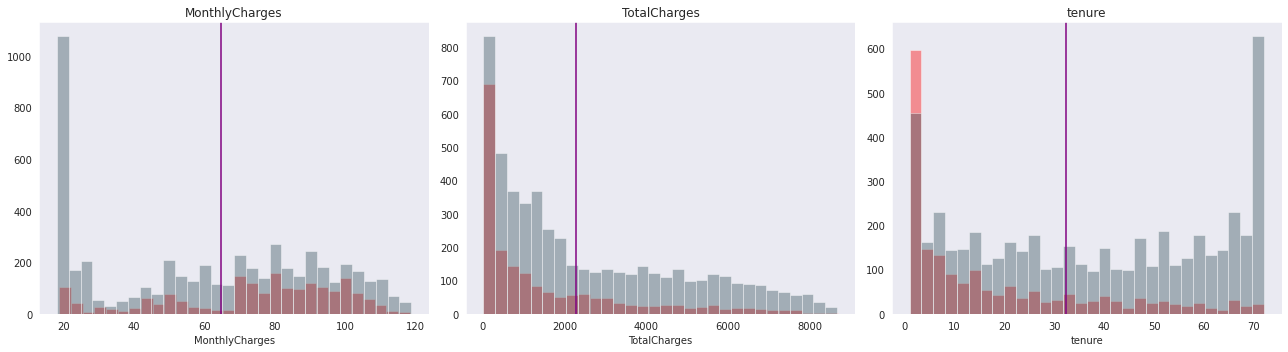

In [111]:
# distribuições das variáveis numéricas
sns.set_palette("GnBu_d")
sns.set_style('dark')
columns_int = df2[['MonthlyCharges','TotalCharges','tenure']].columns
df_churn = df2[df2.Churn == 'Yes'][['MonthlyCharges','TotalCharges','tenure']]
df_no_churn = df2[df2.Churn == 'No'][['MonthlyCharges','TotalCharges','tenure']]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

i = 0
for column in columns_int:
  i += 1
  plt.subplot(1,3,i)
  sns.distplot(df_churn[column],color='red', bins=30,kde=False)
  sns.distplot(df_no_churn[column],bins=30,kde=False)
  plt.axvline(df2[column].mean(), label="Média", c='purple')
  plt.title(column)

plt.tight_layout()

In [112]:
# estatísticas básicas dos dados numéricos
df2.drop('SeniorCitizen',1).describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


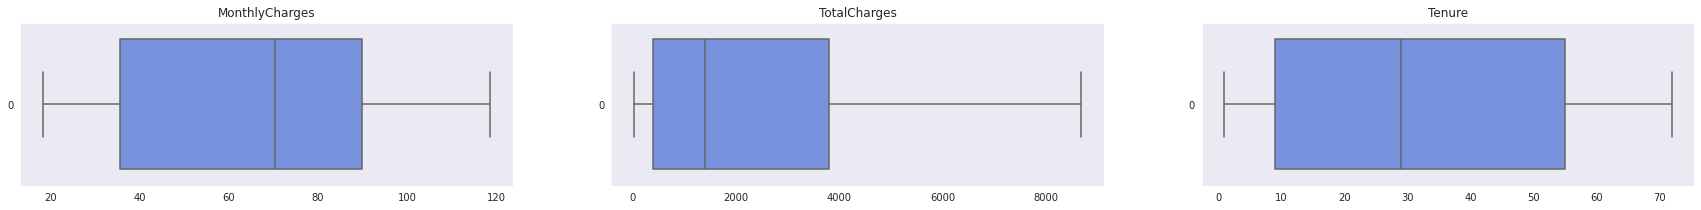

In [113]:
# verificar se há preseça de outiliers nos dados numéricos
sns.set_palette("coolwarm")
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3, figsize=(30,3))
sns.boxplot(data=df2['MonthlyCharges'],orient='h', ax=ax1)
ax1.set_title('MonthlyCharges')
sns.boxplot(data=df2['TotalCharges'],orient='h', ax=ax2)
ax2.set_title('TotalCharges')
sns.boxplot(data=df2['tenure'],orient='h', ax=ax3)
ax3.set_title('Tenure');

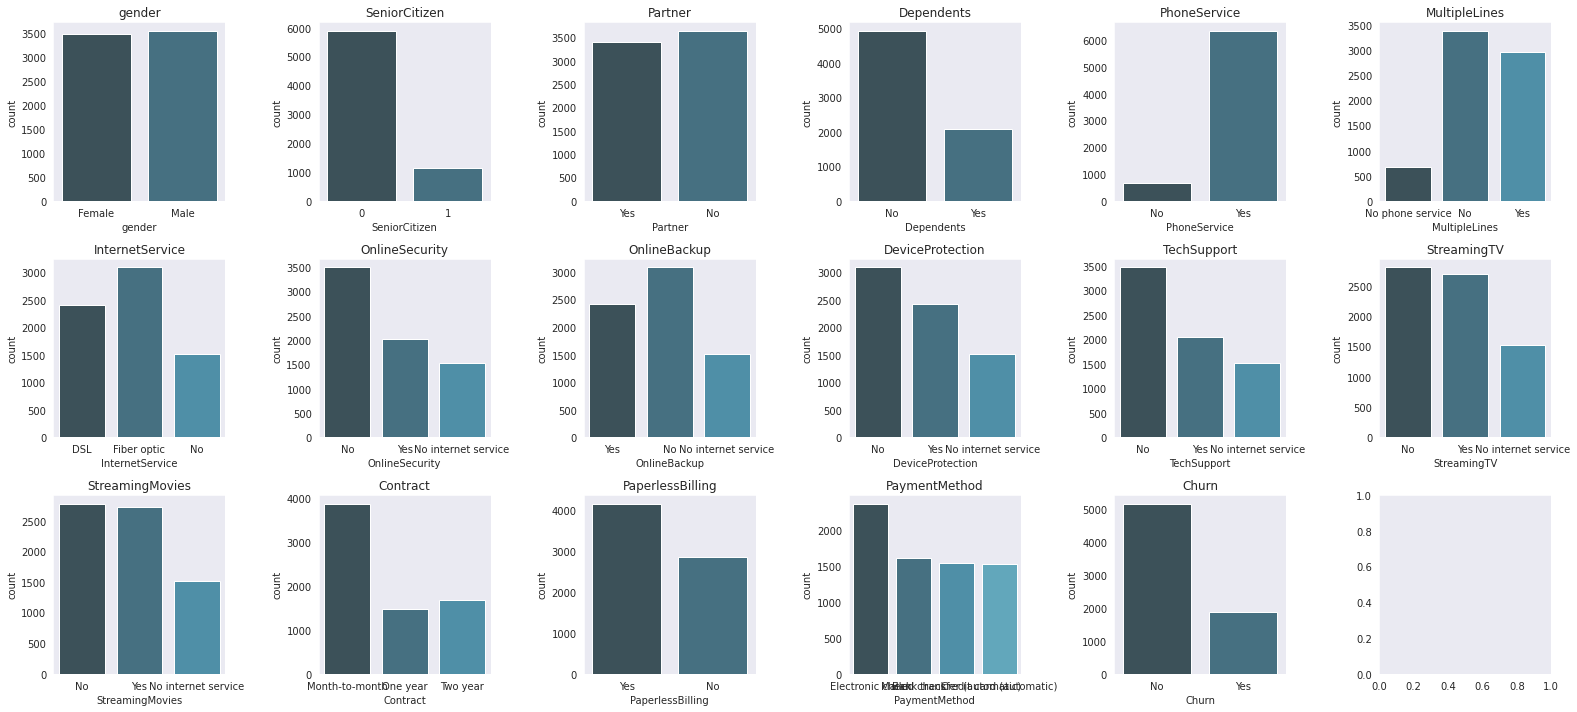

In [114]:
# distribuições das variáveis categóricas
sns.set_palette("GnBu_d")
sns.set_style('dark')
columns_int = df2.drop(['customerID','TotalCharges','tenure','MonthlyCharges'], axis=1).columns

fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(22,10))

i = 0
for column in columns_int:
  i += 1
  plt.subplot(3,6,i)
  sns.countplot(df2[column])
  plt.title(column)

plt.tight_layout()  

In [115]:
# estatísticas básicas dos dados categóricos
df2_des  = df2.copy()
df2_des['SeniorCitizen'] = df2_des['SeniorCitizen'].map({0:'No',1:'Yes'})
df2_des.drop('customerID',1).describe(include='O')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


As informações dispostas anteriormente, apresentam que as taxas mensais para *churn* e *clientes ativos* têm uma distribuição semelhante, contudo, no intervalo até 20, há maior frequência de taxa mensal para *clientes ativos*.

Com relação a taxa total, temos que *churn* ocorre com mais periodicidade para valores baixos e quanto maior são esses valores, menor o índice de pessoas que usam esse tipo de serviço.

Já a quantidade de meses de assinatura têm uma distribuição inversa entre os indivíduos que cancelam e os que permanecem ativos, ou seja, clientes que estejam no ínicio da assinatura tendem a cancelar mais do que pessoas que já tem uma experiência com a empresa. E os fatores para o cancelamento são vários, partindo do não atendimento da expectativas de compra ou até mesmo porque o cliente só queria aproveitar uma promoção inicial.

Ademais, nenhuma dessas features apresentam valores fora do padrão dos dados, como é possível identificar pelos box-plots.

Se tratando das variáveis categóricas, identificamos que `gênero` e `parceiros`, variáveis binárias, estão bem distribuidos com suas classes. Já as demais features, inclusive as multiclasses apresentam frequências mais diversificadas.

Isso nos leva a pensar em uma análise mais profunda, principalmente no que diz respeito a seus comportamentos quando relacionado ao atributo *Churn*.

### A seguir estudaremos os padrões das features nos casos dos clientes com *Churn*, especificamente. 

In [116]:
def display_percent(plot, feature, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 10, ha="center")
    plt.show()

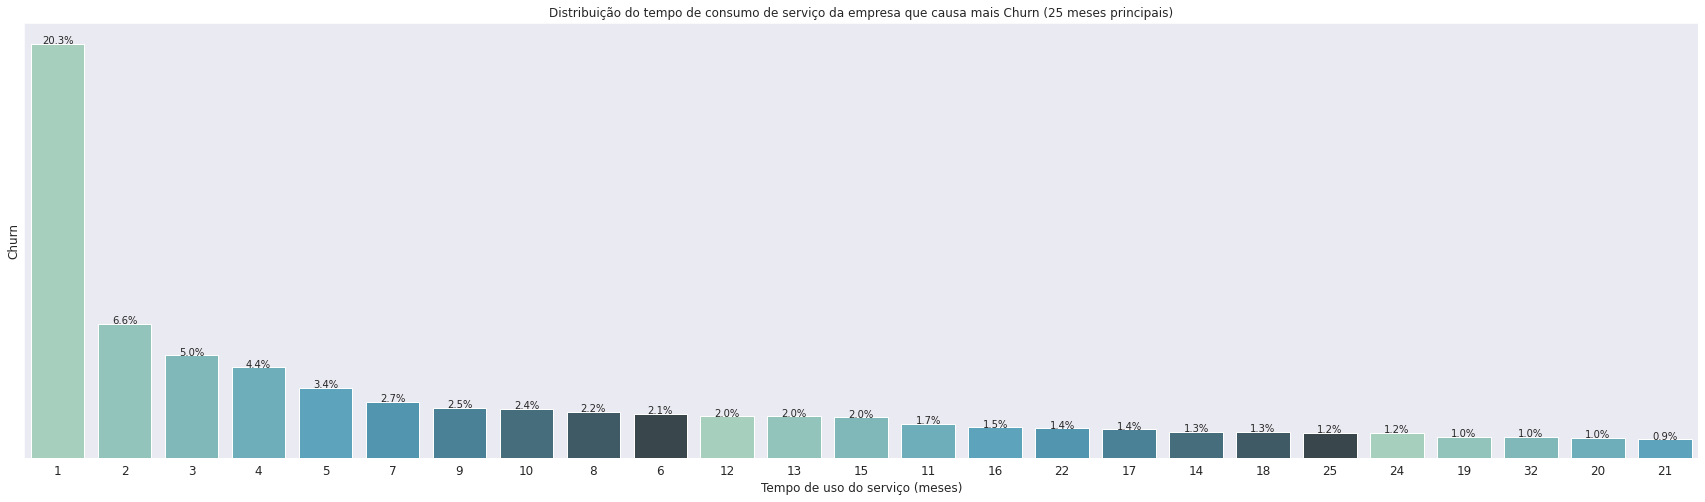

In [117]:
p = sns.color_palette("GnBu_d", 10)
p.reverse()

df_top_churn = pd.DataFrame(df2[df2['Churn'] == 'Yes']['tenure'].value_counts().sort_values(ascending=False))
total_churn = df2[df2['Churn'] == 'Yes'].shape[0]

fig, ax = plt.subplots(figsize=(30,8))
sns_lifespan = sns.barplot( x = df_top_churn[:25].index, y = df_top_churn[:25].tenure, ax=ax, palette=p, order=df_top_churn[:25].index)
plt.xticks(size=12)
plt.title('Distribuição do tempo de consumo de serviço da empresa que causa mais Churn (25 meses principais)')
plt.xlabel('Tempo de uso do serviço (meses)', size=12)
plt.yticks(size=12)
plt.ylabel('Churn', size=12)
plt.tick_params(labelleft=False)

display_percent(ax, df_top_churn, total_churn)

sns_lifespan.figure.savefig("churn_rate_tenure.png", dpi=600)

Aqui podemos perceber que assinantes tendem a cancelar mais seu cadastro logo no primeiro mês, como relatado anteriormente, por vários fatores e a medida que estão familiarizados com a empresa, acima de 11 meses por exemplo, a porcentagem de *Churn* diminui, ficando igual ou abaixo de 2%. 

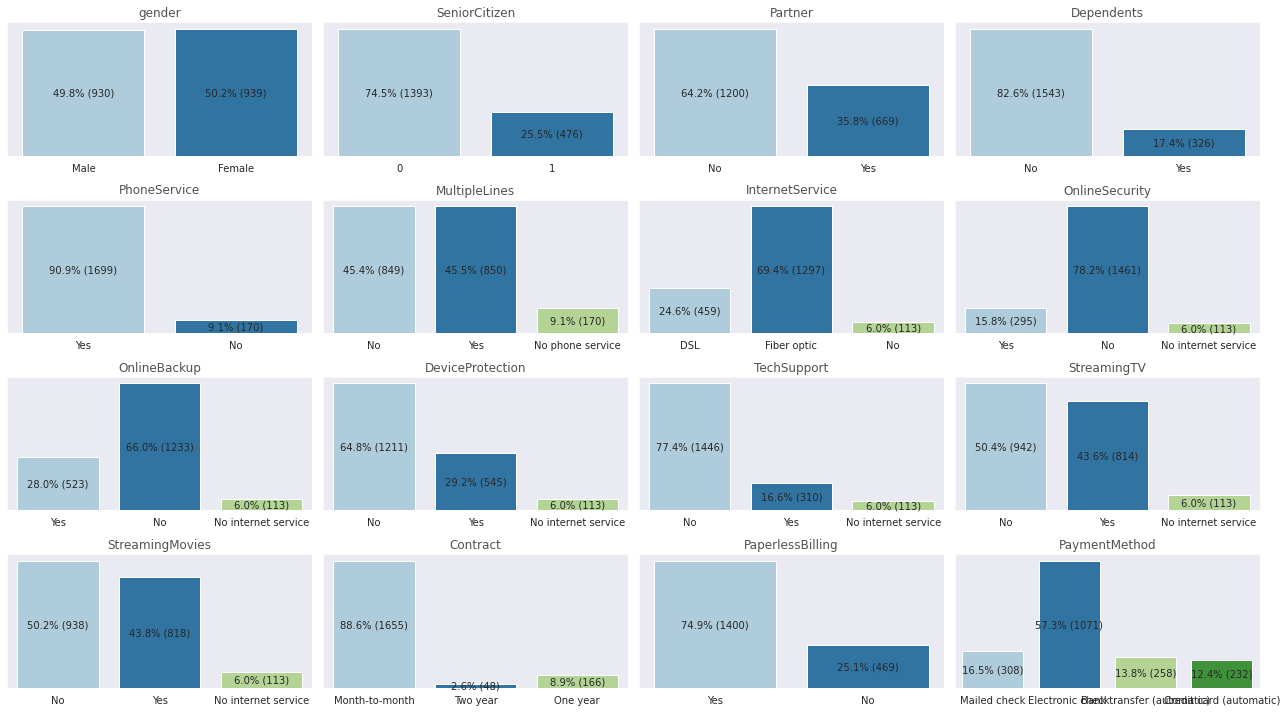

In [118]:
fig, ax = plt.subplots(nrows=4,ncols=4, figsize=(18,10))

palette = 'Paired'
data_churn = df2.query('Churn == "Yes"')
data_churn = data_churn.drop(['customerID','MonthlyCharges','tenure','TotalCharges','Churn'],1) 
  
idx = 0
for c in data_churn.columns:
  idx += 1
  plt.subplot(4,4, idx)
  ax = sns.countplot(x=data_churn[c], data=data_churn, palette=palette)

  plt.xticks(size=10)
  plt.xlabel('')
  plt.yticks(size=12)
  plt.ylabel('')
  plt.subplots_adjust(hspace = 0.4)
  ax.tick_params(labelleft=False)
  ax.set_title(c, alpha=0.8)

  for p in ax.patches:
    text = '{:.1f}% ({})'.format(100 * p.get_height() / data_churn.shape[0], p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() * 0.5
    ax.annotate(text, (x, y), size = 10, ha="center", va="center")
  plt.tight_layout();

Nos gráficos acima, temos claramente quais classes de cada variável é mais suscetível a deixar os serviços dessa empresa de telecomunicações. 

A causa de *Churn* por gênero é ocasionada em proporções muito próximas, já que esse tipo de serviço prestado não prioriza algum grupo específico. 

Mas no que diz respeito a ser idoso ou não, há influências, sendo que jovens tendem a ter uma maior rotatividade, cerca de 3 vezes a mais, devido ao vasto acesso a informações por estarem mais presente no meio tecnológico, curiosidade em novos planos, insatisfação, por serem mais sujeito a enfrentar as causas "burocráticas", entre outros motivos. Idosos na maioria das vezes quando assinam algum plano ou alguém assina pra eles, preferem manter o contrato.

Percebe-se também que clientes não parceiros e não dependentes causam mais *Churn*, cerca de 64% e 82% respectivamente.

De modo geral, indivíduos com serviço telefônico provocam alta rotatividade, cerca de 91% da base clientes de *Churn*.

Assinantes que optam por contratos mensais tem cerca de 30 vezes mais chance de cancelar do que pessoas que escolhem contratos de 2 anos e 10 vezes mais chance do que quem opta pelo cadastro anual. 

Outras características interessantes que predominam no cancelamento de contratos são de pessoas que: 
* *Possuem internet fibra óptica*
* *Não possuem: serviço de segurança online, backup online, proteção de dispositivos e nem suporte técnico*
* *Possuem faturas online*
* *Escolhem pagar através de cheque eletrônico*

#### O próximo passo é identificar se há relações entre as variáveis numéricas

<Figure size 1440x360 with 0 Axes>

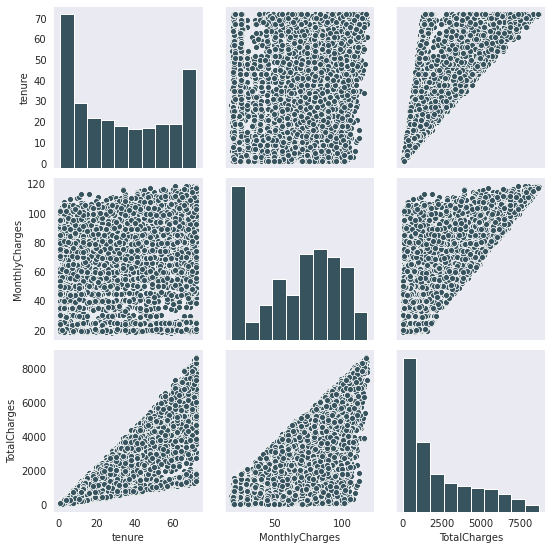

In [119]:
plt.figure(figsize=(20,5))
sns.pairplot(df2.drop('SeniorCitizen',1));

Os plots anteriores nos indicam que algumas features numéricas tendem a se relacionar positivamente. Verificaremos isso através da matriz de correlação abaixo.

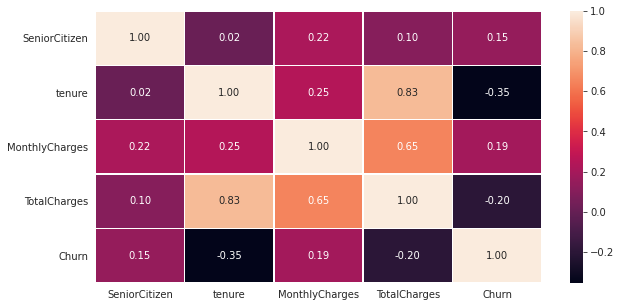

In [120]:
df2_corr = df2.copy()
df2_corr['Churn'] = df2_corr['Churn'].map({'No':0,'Yes':1})
plt.figure(figsize=(10,5))
sns.heatmap(df2_corr.corr(), linewidths=0.5, fmt=".2f", annot=True, linecolor='white');

Como era de se esperar, temos que a variável `TotalCharges` tem forte correlação com as features `tenure` e `MonthlyCharges`, 0.83 e 0.65, respectivamente.

## **Pré-processamento** 

#### Esta etapa visa preparar os dados para que o modelo de *Machine Learning* consiga interpretá-los corretamente.

In [121]:
# criar uma cópia do df para realizar os tratamentos
df_clean = df2.copy()

# identificar as colunas categóricas binárias para transformar seus valores
binario = []
cols = []
for i in df_clean.columns:
  if i in df_clean.select_dtypes(include=['object']).columns:
    if len(df_clean[i].unique()) == 2: #df.nunique#
      cols.append(i)
      binario.append({i:[df_clean[i].unique()[0],df_clean[i].unique()[1]]})

print(binario)

[{'gender': ['Female', 'Male']}, {'Partner': ['Yes', 'No']}, {'Dependents': ['No', 'Yes']}, {'PhoneService': ['No', 'Yes']}, {'PaperlessBilling': ['Yes', 'No']}, {'Churn': ['No', 'Yes']}]


In [122]:
# transformar as classes para valores numéricos
df_clean[cols] = df_clean[cols].replace({"Male":0,"Female":1,"No":0,"Yes":1})

In [123]:
# verificar se transformou corretamente
df_clean[cols].head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,1,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,1,1,1
3,0,0,0,0,0,0
4,1,0,0,1,1,1


In [124]:
# encontrar as colunas não binárias e suas classes
not_binario = []
cols2 = []
for i in df_clean.columns[1:]:
  if i in df_clean.select_dtypes(include=['object']).columns:
    if len(df_clean[i].unique()) != 2:
      cols2.append(i)
      not_binario.append({i:df_clean[i].unique()})

print(not_binario)

[{'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object)}, {'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object)}, {'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object)}, {'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object)}, {'DeviceProtection': array(['No', 'Yes', 'No internet service'], dtype=object)}, {'TechSupport': array(['No', 'Yes', 'No internet service'], dtype=object)}, {'StreamingTV': array(['No', 'Yes', 'No internet service'], dtype=object)}, {'StreamingMovies': array(['No', 'Yes', 'No internet service'], dtype=object)}, {'Contract': array(['Month-to-month', 'One year', 'Two year'], dtype=object)}, {'PaymentMethod': array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)}]


In [125]:
# como as variáveis categóricas não tem uma "ordem de importância" entre as classes, irei aplicar o método get_dummies
df_final = pd.get_dummies(df_clean,columns=cols2)

In [126]:
# apresentar o DF com as codificações da features 
df_final = df_final.drop('customerID',1)
df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


## **Modelos de Machine Learning**

#### Na modelagem buscamos encontrar o algoritmo com melhor resultado de **Recall**, métrica escolhida para idenficar com o máximo de acerto os clientes que tendem a cancelar o contrato com a empresa.

#### Inicialmente vamos dividir os dados em conjunto de treino e teste para avaliá-lo mais a frente.

In [127]:
# separar os conjunto de treino e teste
X = df_final.drop("Churn",axis=1)
y = df_final.Churn

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)

#### Para facilitar a aplicação dos algoritmos, criaremos uma função com *Pipeline*.

In [128]:
# função de validação
def val_model(X, y, clf, quite=False):

    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring='recall')

    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

#### Verificar o balanceamento entre as classes de *Churn*, pois dados desbalanceados influenciam na performance do modelo.

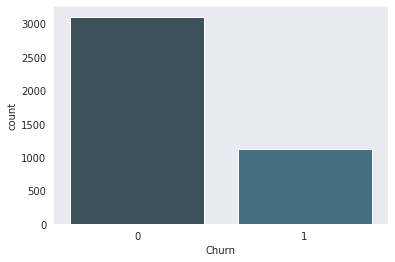

In [129]:
# verificar o balanceamento dos dados
sns.countplot(y_train);

Como podemos ver, as classes da variável alvo estão bastante desbalanceadas. Contudo, criaremos um modelo inicial para verificar seu rendimento na métrica de interesse.

In [130]:
# Baseline com RandomForestClassifier com dados desbalanceados
forest = RandomForestClassifier(random_state=0)
score_baseline = val_model(X_train,y_train,forest)

Recall: 0.48 (+/- 0.02)


Acima, temos que o modelo não obteve bons resultados.

#### Aqui iremos padronizar os dados e balancear as classes de *Churn* para que o resultado melhore.  

#### Começaremos com uma baseline de modelos sem otimização de parâmentros e em seguida, com o algoritmo escolhido, iremos tuná-lo para melhor prever os clientes que tendem a cancelar os contratos, reduzindo custos para empresa.

In [131]:
#  padronizar os  dados,
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# balancear os dados
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


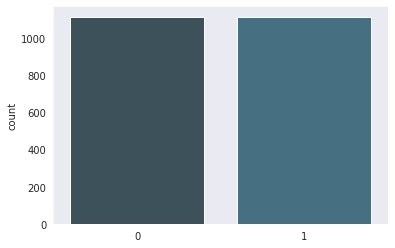

In [132]:
# verificar o tamanho da amostra com os dados balancedos
sns.countplot(y_rus);

In [133]:
# instanciar modelos
forest = RandomForestClassifier(random_state=0)
tree = DecisionTreeClassifier(random_state=0)
sgdc = SGDClassifier(random_state=0)
svc = SVC(random_state=0)
lgr = LogisticRegression(random_state=0)
xgb = XGBClassifier(random_state=0)
lgbm = LGBMClassifier(random_state=0)
ada = AdaBoostClassifier(random_state=0)
grd = GradientBoostingClassifier(random_state=0)

modelo = []
recall = []

for clf in (forest,tree,sgdc,svc,lgr,xgb,lgbm,ada,grd):
  modelo.append(clf.__class__.__name__)
  recall.append(val_model(X_rus,y_rus,clf,quite=True))

pd.DataFrame(data=recall,index=modelo, columns=['Recall'])

,Recall
RandomForestClassifier,0.755585
DecisionTreeClassifier,0.659753
SGDClassifier,0.776193
SVC,0.793185
LogisticRegression,0.803031
XGBClassifier,0.800332
LGBMClassifier,0.760050
AdaBoostClassifier,0.789578
GradientBoostingClassifier,0.788709


Os resultados acima nos proporciona uma escolha mais direcionada sobre o classificador de interesse.

Temos que o `XGBClassifier` e a `LogisticRegression` obtiveram as melhores performance, com `recall` acima de 0.80. Contudo, optei por trabalhar com o `AdaBoostClassifier`, que apesar de inferior aos citados anteriormente, ainda assim teve o `recall` de 0.789.

#### A seguir, trabalharemos o melhor conjunto de parâmetros para o algoritmo escolhido.

In [134]:
ada = AdaBoostClassifier(learning_rate=0.1, random_state=0)

param_grid = {
    'n_estimators':range(1,100,1)
}

# identificar o melhor parâmetro
cv = StratifiedKFold(n_splits=10,shuffle=True)
grid_search = GridSearchCV(ada, param_grid, scoring='recall', n_jobs=-1, cv=cv)
grid_result = grid_search.fit(X_rus,y_rus)

print('Recall: {} - Parâmetro: {}'.format(grid_result.best_score_,grid_result.best_params_))

Recall: 0.8818613256113256 - Parâmetro: {'n_estimators': 1}


In [135]:
ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=1, random_state=0)

param_grid = {
    'learning_rate':[0.001, 0.01, 0.1, 1]
}

# identificar o melhor parâmetro
cv = StratifiedKFold(n_splits=10,shuffle=True)
grid_search = GridSearchCV(ada, param_grid, scoring='recall', n_jobs=-1, cv=cv)
grid_result = grid_search.fit(X_rus,y_rus)

print('Recall: {} - Parâmetro: {}'.format(grid_result.best_score_,grid_result.best_params_))

Recall: 0.8818693693693692 - Parâmetro: {'learning_rate': 0.001}


              precision    recall  f1-score   support

           0       0.94      0.57      0.71      2061
           1       0.43      0.89      0.58       752

    accuracy                           0.66      2813
   macro avg       0.68      0.73      0.65      2813
weighted avg       0.80      0.66      0.68      2813



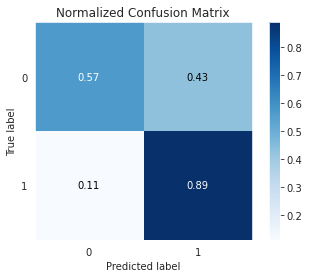

In [137]:
# modelo final
ada = AdaBoostClassifier(learning_rate=0.001, n_estimators=1, random_state=0)
ada.fit(X_rus,y_rus)
pred = ada.predict(X_test)

print(classification_report(y_test,pred))

skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)

## **Conclusões:**

Por meio da análise exploratória dos dados, foi possível identificar alguns erros de preenchimento na base, nos levando a uma reformulação da estrutura.
Verificamos também que grande parte das features são do tipo `object`, o que proporciona uma série de aplicações interessantes voltadas a esses dados no Machine Learning. Mas para isso, é necessário todas as etapas de descrição da base.

Com isso identificamos as distribuições das variáveis e as classes que mais eram suscetível ao cancelamento de contratos, encontrando alguns padrões importantes ao seram comparados com o dia-a-dia de um cliente.

Após concluir as etapas de entendimento situacional, partimos para aplicação do pré-processamento dos dados, ao qual incluiu a codificação de variáveis categóricas binárias e multiclasses.

Por conseguinte, construimos uma baseline de algoritmos de Machine Learning e escolhemos o classificador `AdaBoostClassifier` para a fase de tuning de parâmetros, onde obtivemos um modelo final com `Recall` de 0.89, ou seja, que está prevendo 89% do total de possíveis clientes sujeitos ao *Churn*. 



Para saber mais informações sobre Data Science e divulgação de projetos, me acompanhem no [linkedIn](https://www.linkedin.com/in/ds-marcos-costa/) e sigam meu blog no [medium](https://medium.com/@marcoscosta1475).